 ### **Step 1: Preprocessing the Text**
-  Before performing frequency analysis, text data needs to be cleaned and processed. </br>
- Convert text to lowercase (to avoid counting "NLP" and "nlp" separately). </br>
- Remove special characters and punctuation (to count words properly). Tokenize the text (split it into individual words). </br>
 - Optionally, remove stopwords (common words like "the," "is," "and" that do not add much meaning).

In [2]:
import re
import matplotlib.pyplot as plt
from collections import Counter
# Sample text
text = """Natural Language Processing (NLP) is a field of artificial intelligence. 
NLP allows computers to understand human language. NLP techniques include tokenization, 
part-of-speech tagging, named entity recognition, and machine translation."""
# Preprocessing: Convert text to lowercase and remove special characters
text = text.lower()
text = re.sub(r'[^a-z\s]', '', text)  # Remove punctuation
# Tokenize words
words = text.split()

 ### **Step 2: Counting Word Frequencies**
 - After preprocessing, we count how many times each word appears.
 - The Counter() class from the collections module helps efficiently count word occurrences.
 - We can extract the top N most common words to focus on the most relevant words.

In [4]:
# Count word frequencies
word_counts = Counter(words)
# Display top 10 most common words
print("Top 10 words:", word_counts.most_common(10))

Top 10 words: [('nlp', 3), ('language', 2), ('natural', 1), ('processing', 1), ('is', 1), ('a', 1), ('field', 1), ('of', 1), ('artificial', 1), ('intelligence', 1)]


 ### **Step 3: Visualizing the Data**
 Why visualize word frequency? Helps in identifying trends and important words at a glance. Useful in market research, and social media
 analysis.</br></br>
 **Common visualization techniques:** </br>
 - Bar charts: Best for structured data representation.
 - Word clouds: Show the importance of words based on size.
 - Histograms: Display the distribution of word frequencies

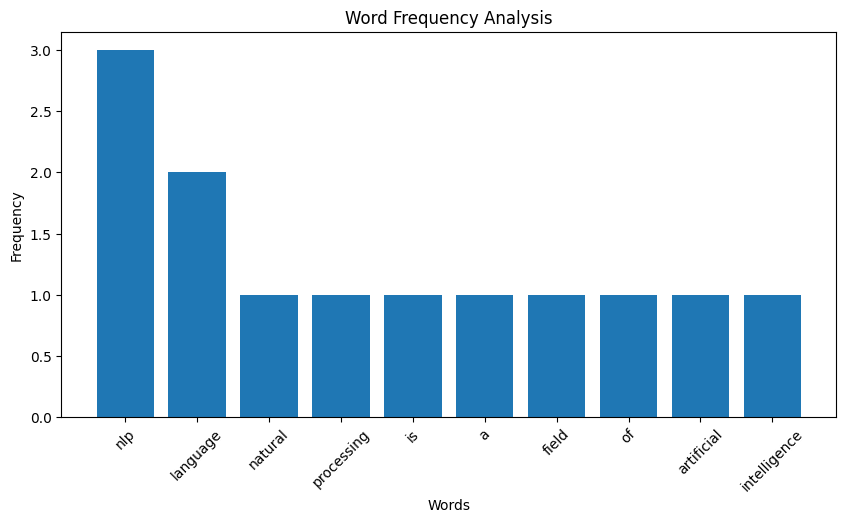

In [5]:
# Visualization using Bar Chart
plt.figure(figsize=(10, 5))
plt.bar(*zip(*word_counts.most_common(10)))  # Plot top 10 words
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Analysis")
plt.xticks(rotation=45)
plt.show()

### **Word Cloud Visualization**
What is Stop Word Removal?</br>
Stop words are common words (e.g., the, is, in, and, of, to) that appear frequently in text but do not carry significant meaning.



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prady\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


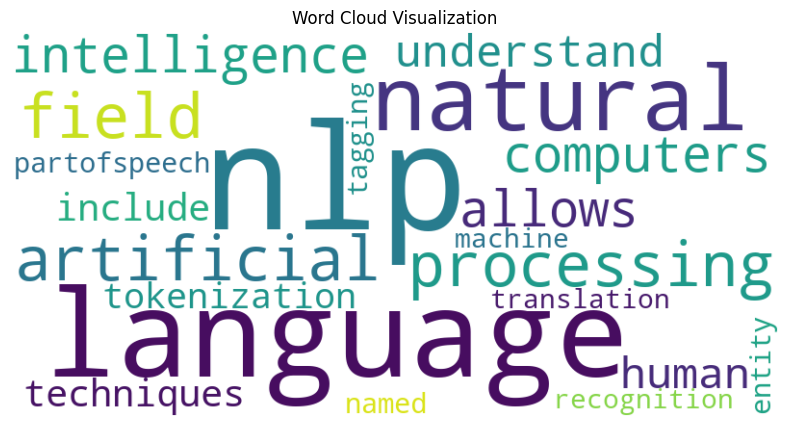

In [7]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk
# Download stopwords if not already available
nltk.download('stopwords')
# Define stopwords
stop_words = set(stopwords.words('english'))
# Tokenization and Stopword Removal
words = text.split()
filtered_words = [word for word in words if word not in stop_words]  # Remove stopwords
# Count word frequencies
word_counts = Counter(filtered_words)

# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
# Display Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud Visualization")
plt.show()

### **Pie Chart**

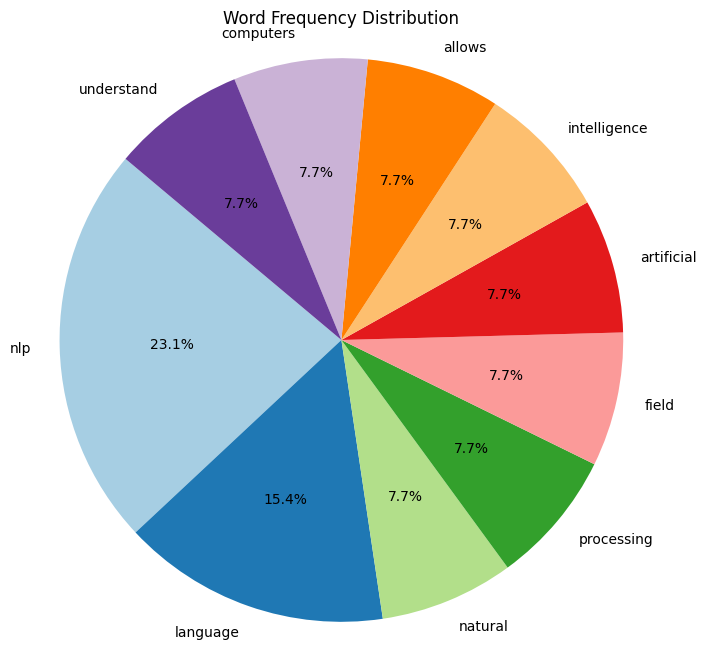

In [8]:
# Get top 10 words and their frequencies
top_words, top_counts = zip(*word_counts.most_common(10))

# Plot Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(top_counts, labels=top_words, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.axis("equal")  # Equal aspect ratio ensures the pie is circular.
plt.title("Word Frequency Distribution")
plt.show()


### **Line Graph**

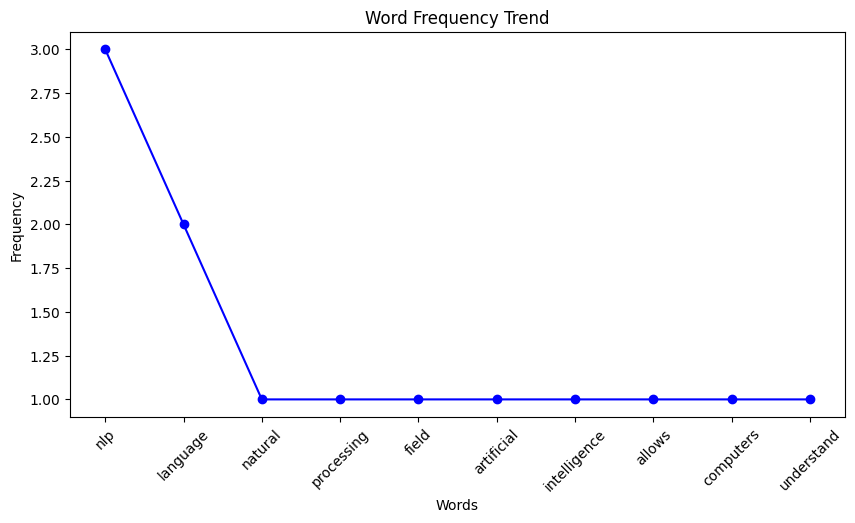

In [9]:
plt.figure(figsize=(10, 5))
plt.plot(top_words, top_counts, marker='o', linestyle='-', color='b')
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Trend")
plt.xticks(rotation=45)
plt.show()


### **Bigrams and Trigrams**

Instead of analyzing single words (unigrams), we can extract bigrams (two-word phrases) and trigrams (three-word phrases) for better context.

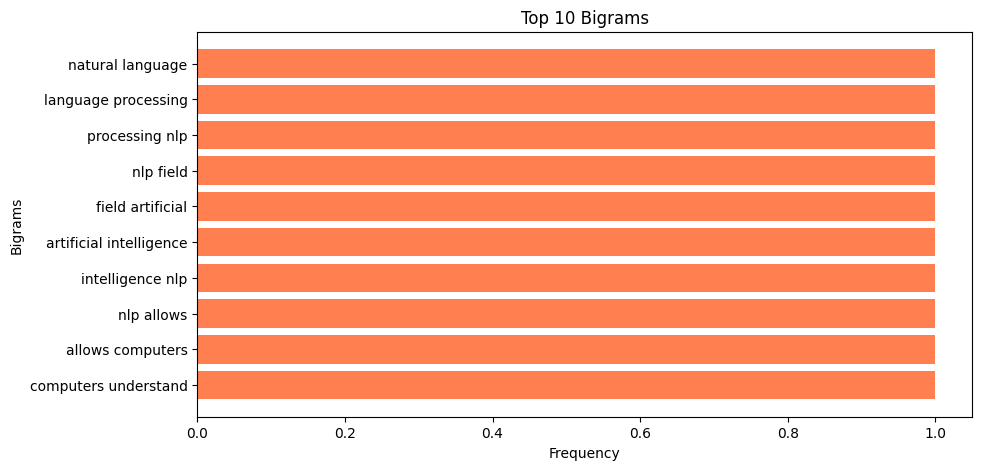

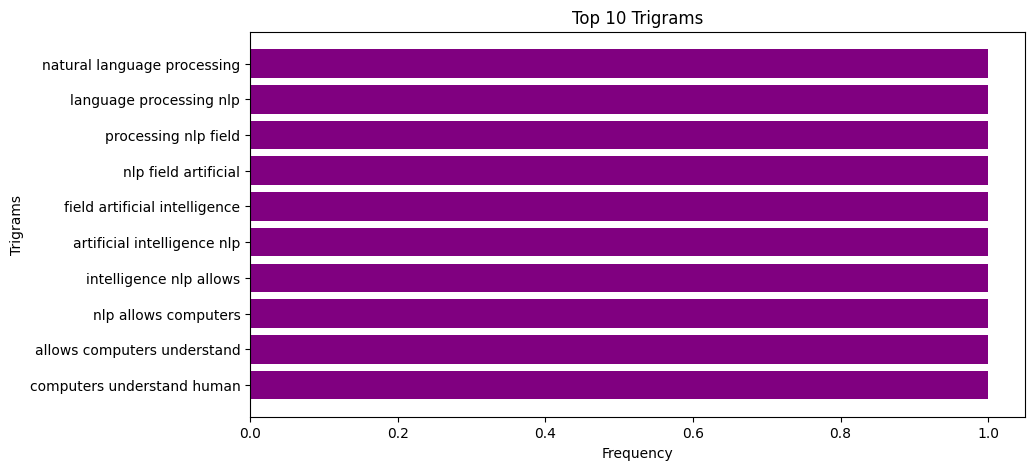

In [10]:
from collections import Counter
from nltk.util import ngrams

# Generate Bigrams and Trigrams
bigrams = list(ngrams(filtered_words, 2))  # Two-word phrases
trigrams = list(ngrams(filtered_words, 3))  # Three-word phrases

# Count frequencies
bigram_counts = Counter(bigrams)
trigram_counts = Counter(trigrams)

# Get the top 10 bigrams and trigrams
top_bigrams = bigram_counts.most_common(10)
top_trigrams = trigram_counts.most_common(10)

# Convert tuples to strings for visualization
bigram_labels, bigram_values = zip(*[(f"{w1} {w2}", count) for (w1, w2), count in top_bigrams])
trigram_labels, trigram_values = zip(*[(f"{w1} {w2} {w3}", count) for (w1, w2, w3), count in top_trigrams])

# Plot Bigrams
plt.figure(figsize=(10, 5))
plt.barh(bigram_labels[::-1], bigram_values[::-1], color='coral')
plt.xlabel("Frequency")
plt.ylabel("Bigrams")
plt.title("Top 10 Bigrams")
plt.show()

# Plot Trigrams
plt.figure(figsize=(10, 5))
plt.barh(trigram_labels[::-1], trigram_values[::-1], color='purple')
plt.xlabel("Frequency")
plt.ylabel("Trigrams")
plt.title("Top 10 Trigrams")
plt.show()


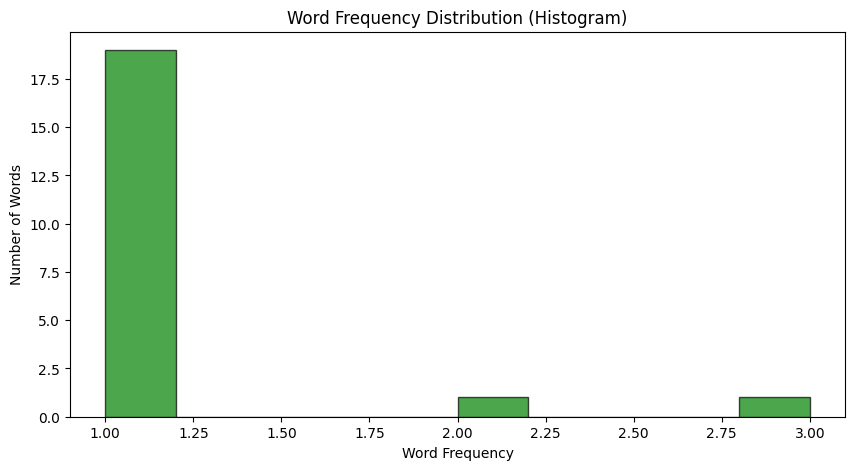

In [11]:
# Extract frequency values
freq_values = list(word_counts.values())

# Plot histogram
plt.figure(figsize=(10, 5))
plt.hist(freq_values, bins=10, color='green', edgecolor='black', alpha=0.7)
plt.xlabel("Word Frequency")
plt.ylabel("Number of Words")
plt.title("Word Frequency Distribution (Histogram)")
plt.show()
